<a href="https://colab.research.google.com/github/KarenSt15/SSF-Oto24-KarenStephania-lvarezReyes/blob/main/SSF_Oto24_KarenStephania%C3%81lvarezReyes_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INCISO A

Ejemplo de clase
128
Naive method
1323
-31
Con Iteraciones
1323
-31
Método Horner
1323
-31

INCISO B

Coseno calculado con serie directa: -1.0000000035290801
Valor exacto del coseno: -1.0
      x    Iteración    Suma    Valor exacto    Error relativo de la aproximación  Tolerancia 10^-4    Toleranica 10^-8
-------  -----------  ------  --------------  -----------------------------------  ------------------  ------------------
3.14159           10      -1              -1                         -3.52908e-09  True                True
  x    Iteración          Suma    Valor exacto    Error relativo de la aproximación
---  -----------  ------------  --------------  -----------------------------------
  1           10   0.540302           0.540302                          2.05482e-16
100           10  -1.51525e+20        0.862319                          1.75718e+20

INCISO C



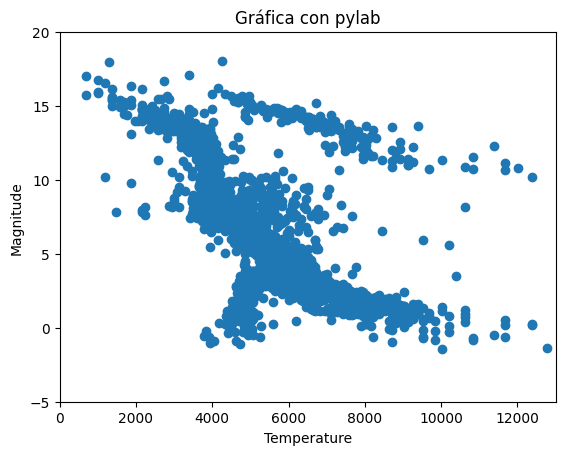

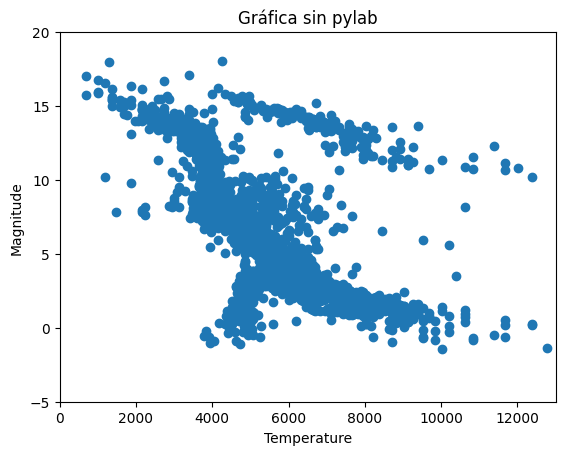

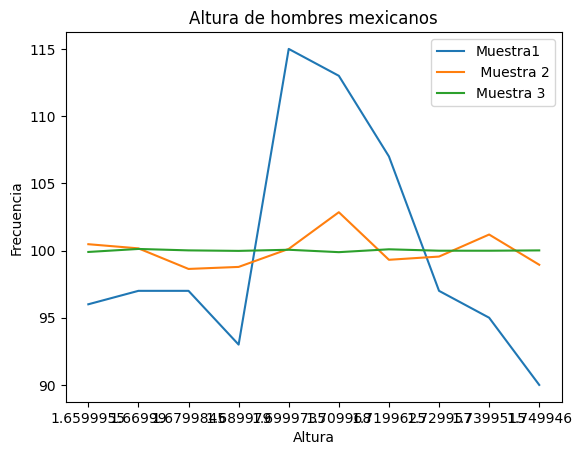

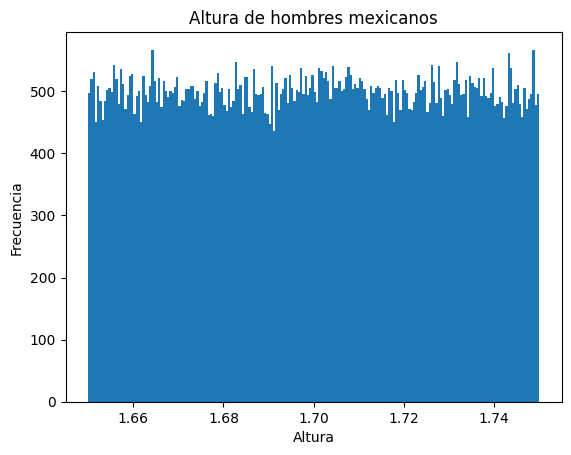

In [ ]:
#T1 - 21/07/24
#Ejemplo Horner

print("INCISO A\n")

def horner(coeffs, x):
  acc = 0
  for c in reversed(coeffs):
    acc = acc * x + c
  return acc

print("Ejemplo de clase")
print(horner([-19, 7, -4, 6], 3))

#a)Variantes de Bendersky's website. Probar con 2-3 ejemplos.

def poly_naive(A, x):
    p = 0
    for i, a in enumerate(A):
        p += (x ** i) * a
    return p

print("Naive method")
print(poly_naive([3, -2, 7, 5], 6))
print(poly_naive([2, 1, -4], 3))

def poly_iter(A, x):
    p = 0
    xn = 1
    for a in A:
        p += xn * a
        xn *= x
    return p

print("Con Iteraciones")
print(poly_iter([3, -2, 7, 5], 6))
print(poly_iter([2, 1, -4], 3))

def poly_horner(A, x):
    p = A[-1]
    i = len(A) - 2
    while i >= 0:
        p = p * x + A[i]
        i -= 1
    return p

print("Método Horner")
print(poly_horner([3, -2, 7, 5], 6))
print(poly_horner([2, 1, -4], 3))

#b) i)Evaluación de cos(x) mediante el cálculo de la serie directa

import math

print("\nINCISO B\n")
x = math.pi
n = 10
coseno = 0
for i in range (n):
  coseno = coseno + ((-1)**i) * (x**(2*i) / (math.factorial(2*i)))
  i*=1
print("Coseno calculado con serie directa:", coseno)

#b) ii) Evaluación de cos(x) mediante computación parcial

cos = math.cos(x)
print("Valor exacto del coseno:", cos)

#Tabla comparativa entre los dos métodos de evaluación

from tabulate import tabulate

error = abs(coseno-cos) / cos
tol4 = math.isclose(coseno, cos, rel_tol = 1e-4)
tol8 = math.isclose(coseno, cos, rel_tol = 1e-8)
d = [[x, n, coseno, cos, error, tol4, tol8]]

print(tabulate(d, headers=["x", "Iteración", "Suma", "Valor exacto", "Error relativo de la aproximación", "Tolerancia 10^-4", "Toleranica 10^-8"]))

#Muestre que para valores pequeños de x, el algoritmo converge a la respuesta correcta, y para valores grandes de x (~ 100), el algoritmo no converge.

xmin = 1
xmax = 100
coseno_min = 0
coseno_max = 0

for i in range (n):
  coseno_max = coseno_max + ((-1)**i) * (xmax**(2*i) / (math.factorial(2*i)))
  coseno_min = coseno_min + ((-1)**i) * (xmin**(2*i) / (math.factorial(2*i)))
  i*=1

cos_min = math.cos(xmin)
cos_max = math.cos(xmax)

error_min = abs(coseno_min-cos_min) / cos_min
error_max = abs(coseno_max-cos_max) / cos_max
d = [[xmin, n, coseno_min, cos_min, error_min], [xmax, n, coseno_max, cos_max, error_max]]

print(tabulate(d, headers=["x", "Iteración", "Suma", "Valor exacto", "Error relativo de la aproximación"]))

#c) Datos de estrellas.

print("\nINCISO C\n")

from __future__ import print_function,division
### http://www-personal.umich.edu/~mejn/computational-physics/

from pylab import *
from numpy import loadtxt

data = loadtxt("stars.dat",float)
x = data[:,0]
y = data[:,1]

#Con pylab
scatter(x,y)
title("Gráfica con pylab")
xlabel("Temperature")
ylabel("Magnitude")
xlim(0,13000)
ylim(-5,20)
show()

#Sin pylab
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.title("Gráfica sin pylab")
plt.xlabel("Temperature")
plt.ylabel("Magnitude")
plt.xlim(0,13000)
plt.ylim(-5,20)
plt.show()

#d) Datos de alturas de hombres mexicanos (A, B). Mostrar los datos gráficamente. (como uds crean que sea lo mejor).

def skip_comments(file):
  for line in file:
    if not line.strip().startswith('#'):
      yield line
file1a = []
file1 = open('altura5.dat')
for line in skip_comments(file1):
  file1a.append(line)

alt = []
frec1 = []
frec2 = []
frec3 = []
for linea in file1a:
  datos = linea.split()
  alt.append(datos[0])
  frec1.append(float(datos[1]))
  frec2.append(float(datos[2]))
  frec3.append(float(datos[3]))

file1.close()

file2 = open('altura6.dat', 'r')

altura_6 = []
for linea in file2:
    altura_6.append(float(linea))

file2.close()

plot(alt, frec1)
plot(alt, frec2)
plot(alt, frec3)
title("Altura de hombres mexicanos")
xlabel("Altura")
ylabel("Frecuencia")
legend(["Muestra1", " Muestra 2", "Muestra 3"])
show()

hist(altura_6, bins=200)
title("Altura de hombres mexicanos")
xlabel("Altura")
ylabel("Frecuencia")
show()